In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv
/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from category_encoders import WOEEncoder

2. Data Acquisition 

In [3]:
# Load the dataset
# data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
# data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data_train = pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
# print(len(data_train))
# data_train.drop(df_train.columns[0], axis=1, inplace=True)
# x_train = data_train.drop('is_fraud', axis=1) 
# y_train = data_train['is_fraud']     

data_test = pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")
# print(len(data_test))

# data_test.drop(df_test.columns[0], axis=1, inplace=True)
data = pd.concat([data_train, data_test])

In [4]:
print('Shape of our Dataset -',data.shape)
data.head()

Shape of our Dataset - (1852394, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [7]:
#Change date type
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],format='mixed')
#clean merchant column
data['merchant'] = data['merchant'].apply(lambda x : x.replace('fraud_',''))
data = pd.get_dummies(data,columns=['gender'],drop_first=True)
data.drop(columns=['trans_date_trans_time', 'dob', 'Unnamed: 0', 'first','last','trans_num','unix_time'],inplace=True)

for col in ['city','job','merchant', 'category', 'state', 'street']:
    data[col] = WOEEncoder().fit_transform(data[col],data['is_fraud'])
data.head()

,cc_num,merchant,category,amt,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,gender_M
0,2703186189652095,1.006109,0.925860,4.97,-0.241661,-0.241661,-0.137702,28654,36.0788,-81.1781,3495,-0.395861,36.011293,-82.048315,0,False
1,630423337322,0.676459,0.894448,107.23,-1.048125,-0.797007,-0.104509,99160,48.8878,-118.2105,149,-0.694779,49.159047,-118.186462,0,False
2,38859492057661,-0.834274,-0.872388,220.11,0.858666,0.858666,-0.209468,83252,42.1808,-112.2620,4154,1.494655,43.150704,-112.154481,0,True
3,3534093764340240,-0.666344,-0.238221,45.00,1.432658,1.432658,-0.225199,59632,46.2306,-112.1138,1939,0.095702,47.034331,-112.561071,0,True
4,375534208663984,-0.402499,-0.613751,41.96,-0.085108,-0.085108,0.231808,24433,38.4207,-79.4629,99,-0.085108,38.674999,-78.632459,0,True


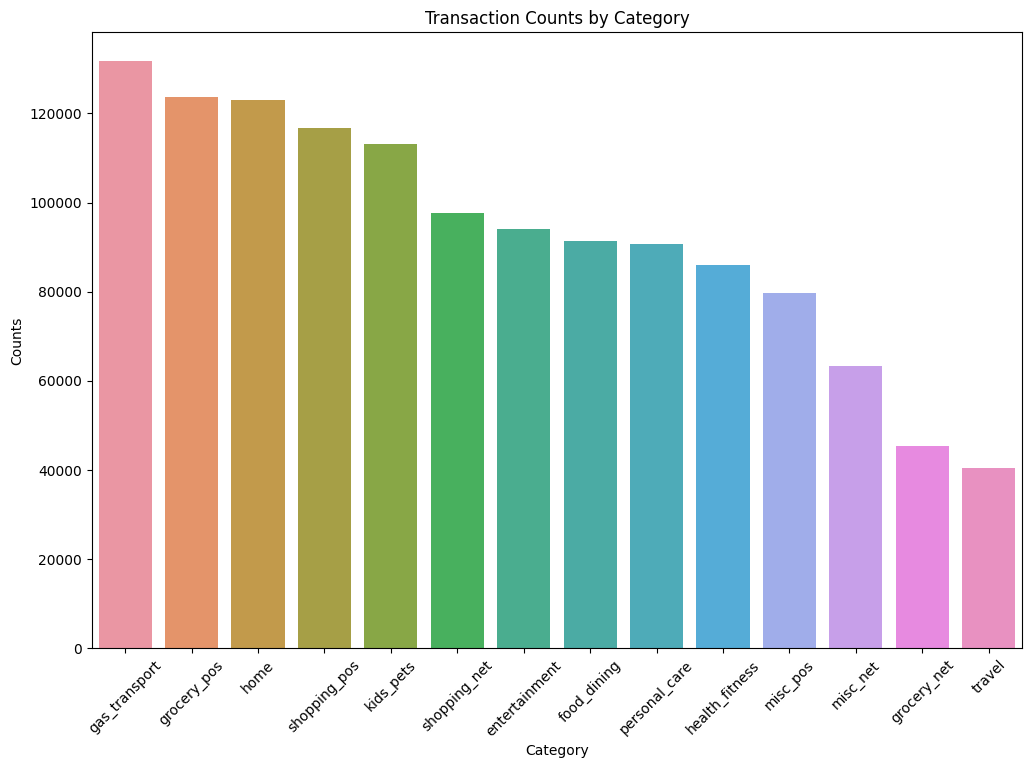

In [8]:
category_counts = data_train['category'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

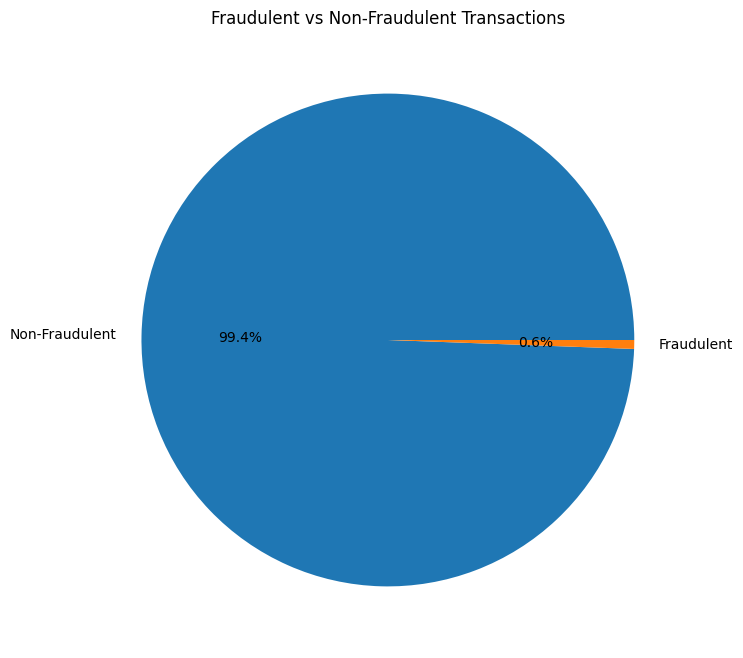

In [9]:
fraud_counts = data_train['is_fraud'].value_counts()
plt.figure(figsize=(8, 8))
fraud_counts.plot(kind='pie', labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('')
plt.show()

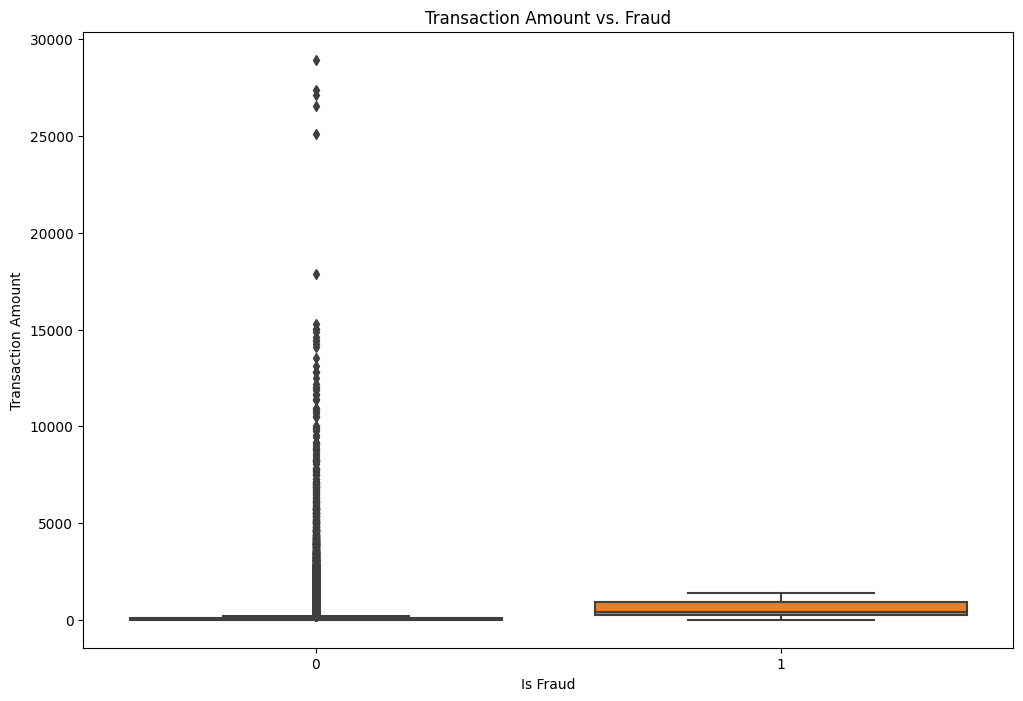

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=data_train)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

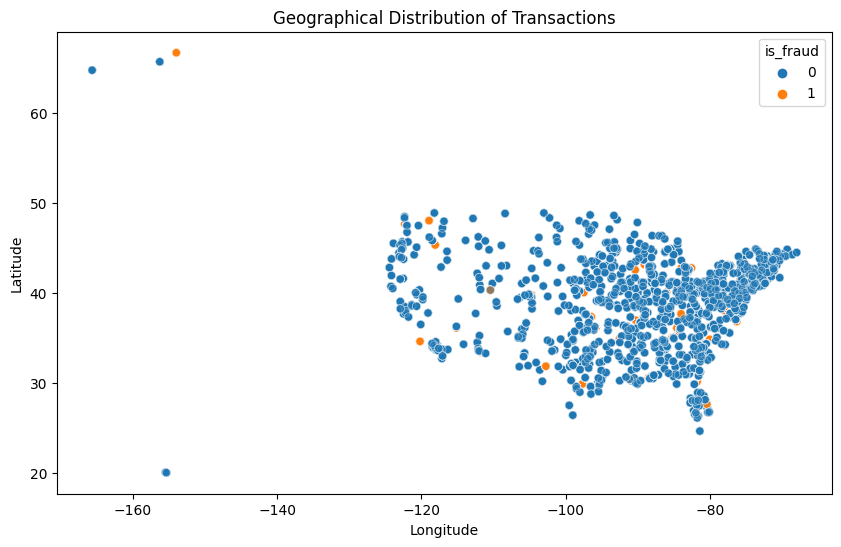

In [11]:
# Scatter plot for geographical distribution of transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=data_train, alpha=0.5)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

2. Data Preprocessing

In [12]:
# remove duplicates
data_train.duplicated().any()
data_test.duplicated().any()
data.drop_duplicates(inplace=True)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
# handling missing values
missing_values = data.isna().sum()
print(missing_values)

cc_num        0
merchant      0
category      0
amt           0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
gender_M      0
dtype: int64


In [15]:
# check for data imbalance
class_counts = data['is_fraud'].value_counts()
print(class_counts)

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


In [ ]:
# data normalization
features = data.columns.drop('is_fraud')  # Drop the target variable
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [ ]:
# split the dataset 
x = data.drop('is_fraud', axis=1)  # Features
y = data['is_fraud']               # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# display the first few rows of splitted dataset
print("x_train:")
print(x_train.head())

print("\nx_test:")
print(x_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())


In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# 3. Model Building
## 3.1 Logistic Regression

In [ ]:
import matplotlib.pyplot as plt 
import time
# initialize the logistic regression model

# parameters: choose solver

#solver
solvers = ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
accuracy = []
times = []

for s in solvers:
    start = time.time()
    logreg = LogisticRegression(solver = s, max_iter = 400)
    # train model
    logreg.fit(x_train_smote, y_train_smote)
    y_pred = logreg.predict(x_test)
    end = time.time()
    
    accuracy.append(accuracy_score(y_test, y_pred))
    times.append(end - start)

plt.figure(1)
plt.plot(solvers, accuracy)
plt.xlabel("solvers")
plt.ylabel("accuracy")

plt.figure(2)
plt.plot(solvers, times)
plt.xlabel("solvers")
plt.ylabel("time")

plt.show()

In [ ]:
#parameter: choose max_iter
iters = [400, 800, 1200]
accuracy = []

for i in iters:
    logreg = LogisticRegression(solver = 'lbfgs', max_iter = i)
    # train model
    logreg.fit(x_train_smote, y_train_smote)
    y_pred = logreg.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(iters, accuracy)
plt.xlabel("iter")
plt.ylabel("accuracy")
plt.show()

In [ ]:
#choose parameter: tol
tols = [0.0001, 0.00001, 0.000001]
accuracy = []

for t in tols:
    logreg = LogisticRegression(solver = 'lbfgs', max_iter = 400, tol = t)
    # train model
    logreg.fit(x_train_smote, y_train_smote)
    y_pred = logreg.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(tols, accuracy)
plt.xlabel("tolerance")
plt.ylabel("accuracy")
plt.show()

In [ ]:
Cs = [1, 0.01, 0.0001, 0.000001]
accuracy = []

for c in Cs:
    logreg = LogisticRegression(solver = 'lbfgs', max_iter = 400, tol = 0.0001, C = c)
    # train model
    logreg.fit(x_train_smote, y_train_smote)
    y_pred = logreg.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(Cs, accuracy)
plt.xlabel("C")
plt.ylabel("accuracy")
plt.show()

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

From the graph, we find out that we have better accuracy with smaller C.

In [ ]:
#logreg = LogisticRegression(solver = 'lbfgs', max_iter = 400, tol = 0.0001, C = 0.000001)
logreg = LogisticRegression()
# train model
logreg.fit(x_train_smote, y_train_smote)
y_pred = logreg.predict(x_test)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
precision = matrix[0][0] / (matrix[0][0] + matrix[1][0])
recall = matrix[0][0] / (matrix[0][0] + matrix[0][1])
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
print("p", precision, " r", recall, " f", f1_score, " a", accuracy)

## 3.2 KNN

In [ ]:
#choose parameter: weight
weights = ['uniform', 'distance']
accuracy = []

for w in weights:
    KNN = KNeighborsClassifier(weights = w)
    # train model
    KNN.fit(x_train_smote, y_train_smote)
    y_pred = KNN.predict(x_test)

    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(weights, accuracy)
plt.xlabel("weight")
plt.ylabel("accuracy")
plt.show()

In [ ]:
neighbors = [2, 5, 8, 11, 13, 15]
accuracy = []

for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
    # train model
    KNN.fit(x_train_smote, y_train_smote)
    y_pred = KNN.predict(x_test)

    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors, accuracy)
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()

In [ ]:
# KNN = KNeighborsClassifier(n_neighbors=2, weights = 'distance')
KNN = KNeighborsClassifier()
# train model
KNN.fit(x_train_smote, y_train_smote)
y_pred = KNN.predict(x_test)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
precision = matrix[0][0] / (matrix[0][0] + matrix[1][0])
recall = matrix[0][0] / (matrix[0][0] + matrix[0][1])
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
print("p", precision, " r", recall, " f", f1_score, " a", accuracy)

## 3.3 Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
#choose parameter: n_estimator
estimator = [2, 5, 8, 11]
accuracy = []

for e in estimator:
    xgb_model = XGBClassifier(n_estimators=e)
    xgb_model.fit(x_train_smote, y_train_smote)
    y_pred = xgb_model.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(estimator, accuracy)
plt.xlabel("nums of estimators")
plt.ylabel("accuracy")
plt.show()

In [ ]:
#choose parameter: max_depth
depths = [2, 4, 6]
accuracy = []

for d in depths:
    xgb_model = XGBClassifier(n_estimators=11, max_depth = d)
    xgb_model.fit(x_train_smote, y_train_smote)
    y_pred = xgb_model.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(depths, accuracy)
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.show()

In [ ]:
#choose parameter: learning rate
rates = [1, 0.1, 0.001]
accuracy = []

for r in rates:
    xgb_model = XGBClassifier(n_estimators=11, max_depth = 6, learning_rate = r)
    xgb_model.fit(x_train_smote, y_train_smote)
    y_pred = xgb_model.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y_pred))
    
plt.plot(rates, accuracy)
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.show()

In [ ]:
xgb_model = XGBClassifier(n_estimators=5, max_depth = 2, learning_rate = 1)
# xgb_model = XGBClassifier()
xgb_model.fit(x_train_smote, y_train_smote)
y_pred = xgb_model.predict(x_test)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
precision = matrix[0][0] / (matrix[0][0] + matrix[1][0])
recall = matrix[0][0] / (matrix[0][0] + matrix[0][1])
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
print("p", precision, " r", recall, " f", f1_score, " a", accuracy)